In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


dataframe = pd.read_csv("./AR_Data.csv", sep=";")
dataframe, dataframe_teste = train_test_split(dataframe, test_size=0.4, random_state=1)

classe_teste = dataframe_teste.iloc[:, 4].values
previsores_teste = dataframe_teste.iloc[:, [0,1,2,3]].values
classe = dataframe.iloc[:, 4].values
previsores = dataframe.iloc[:, [0,1,2,3]].values
print(len(previsores), len(previsores_teste))

label_encoder = LabelEncoder()
for i in range(0, 4):
    previsores[:, i] = label_encoder.fit_transform(previsores[:, i])
    previsores_teste[:, i] = label_encoder.fit_transform(previsores_teste[:, i])

scaler_data = StandardScaler()
previsores = scaler_data.fit_transform(previsores)
previsores_teste = scaler_data.fit_transform(previsores_teste)

previsores

300000 200000


array([[-0.36231603,  0.20457245, -0.47840325, -0.57406837],
       [-0.36231603,  0.20457245, -0.47840325,  0.98986654],
       [-0.36231603,  0.20457245, -0.47840325,  0.98986654],
       ...,
       [-0.36231603,  0.20457245, -0.47840325,  2.55380145],
       [-0.36231603,  0.20457245,  2.02440393,  2.55380145],
       [-0.36231603,  0.20457245, -0.47840325,  0.98986654]])

In [3]:
arvore_classificador = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_classificador.fit(previsores, classe)
arvore_classificador

DecisionTreeClassifier(criterion='entropy', random_state=0)

0.84286
              precision    recall  f1-score   support

    One-Time       0.47      0.96      0.63     27907
   Recurring       0.99      0.82      0.90    172093

    accuracy                           0.84    200000
   macro avg       0.73      0.89      0.76    200000
weighted avg       0.92      0.84      0.86    200000



0.84286

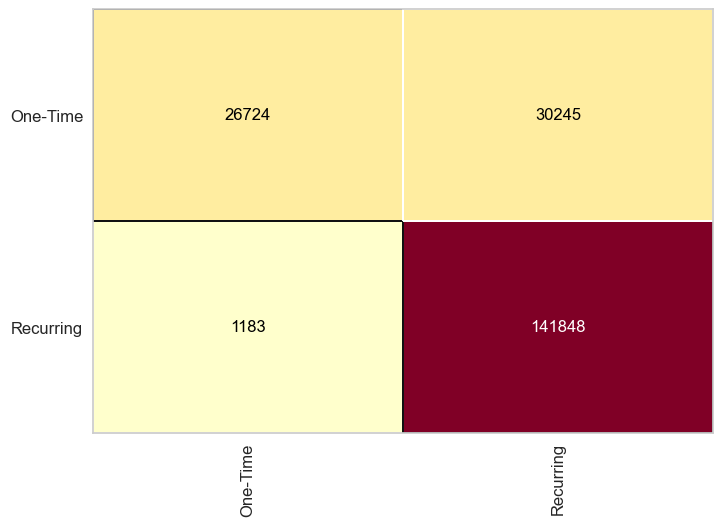

In [5]:
previsoes = arvore_classificador.predict(previsores_teste)
previsores

from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier  import ConfusionMatrix

print(accuracy_score(previsoes, classe_teste))
print(classification_report(previsoes, classe_teste))
cm = ConfusionMatrix(arvore_classificador)
cm.fit(previsores, classe)
cm.score(previsores_teste, classe_teste)
